In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from tests import multi_param_test as tests

In [16]:
def intersection_dist(first_desc,second_desc):
    first_wire = write_path(first_desc)
    second_wire = write_path(second_desc)
    intersections = []
    for i in range(len(first_wire)-1):
        for j in range(len(second_wire)-1):
            a = determine_intersection(first_wire[i][0], 
                                               first_wire[i][1], 
                                               first_wire[i+1][0], 
                                               first_wire[i+1][1],
                                              second_wire[j][0],
                                              second_wire[j][1],
                                              second_wire[j+1][0],
                                              second_wire[j+1][1])
            if a:
                intersections.append(abs(a[0])+abs(a[1]))
    intersections = np.array(intersections)
    intersections = intersections[intersections>0]
    return intersections.min()

def write_path(instructions):
    path = [(0,0)]
    for bit in instructions:
        d = bit[0]
        mag  = int(bit[1:])
        last = path[-1]
        if d=='R':
            new = (last[0]+mag, last[1])
        elif d=='L':
            new = (last[0]-mag, last[1])
        elif d == 'U':
            new = (last[0], last[1]+mag)
        elif d == 'D':
            new = (last[0], last[1]-mag)
        path.append(new)
    return path


def determine_intersection(ax,ay,bx,by,cx,cy,dx,dy):
    if ax == bx:
        x = ax
        y = cy
        xinterval = [min(cx,dx), max(cx,dx)]
        yinterval = [min(ay,by), max(ay,by)]
        rightx = ax >= xinterval[0] and ax <= xinterval[1]
        righty = cy >= yinterval[0] and cy <= yinterval[1]
        
    else:
        x=cx
        y=ay
        xinterval = [min(ax,bx), max(ax,bx)]
        yinterval = [min(cy,dy), max(cy,dy)]
        rightx = cx >= xinterval[0] and cx <= xinterval[1]
        righty = ay >= yinterval[0] and ay <= yinterval[1]
    if rightx and righty:
        return (x,y)
    else:
        return None


def wire_diagram(first_desc, second_desc):
    first_wire = write_path(first_desc)
    second_wire = write_path(second_desc)
    fig, ax = plt.subplots(figsize=(10,10))
    for i in range(len(first_wire)-1):
        ax.plot([first_wire[i][0],first_wire[i+1][0]],[first_wire[i][1], first_wire[i+1][1]], color='red', linestyle=":")
        ax.annotate("{}, {}".format(i+1,first_wire[i+1]), xy=first_wire[i+1], color='red')
    for i in range(len(second_wire)-1):
        ax.plot([second_wire[i][0],second_wire[i+1][0]],[second_wire[i][1], second_wire[i+1][1]], color='black')
        ax.annotate("{}, {}".format(i+1,second_wire[i+1]), xy=second_wire[i+1])

In [13]:
ins = [(['R8','U5','L5','D3'],['U7','R6','D4','L4']),
      ("R75,D30,R83,U83,L12,D49,R71,U7,L72".split(','),'U62,R66,U55,R34,D71,R55,D58,R83'.split(",")),
      ("R98,U47,R26,D63,R33,U87,L62,D20,R33,U53,R51".split(","),"U98,R91,D20,R16,D67,R40,U7,R15,U6,R7".split(","))]
outs = [6,159,135]

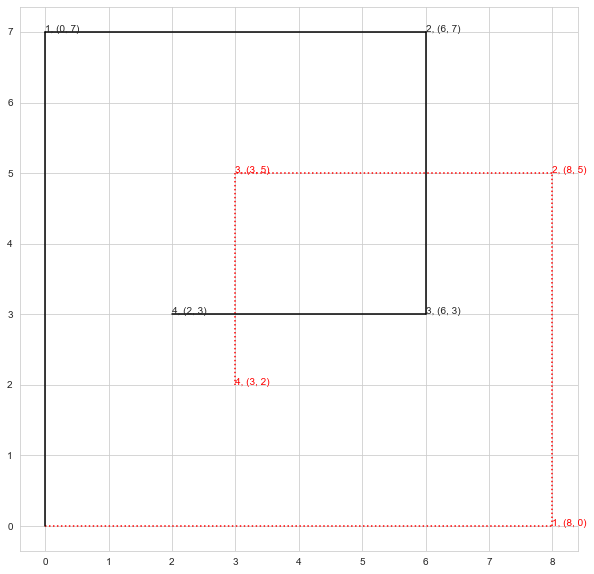

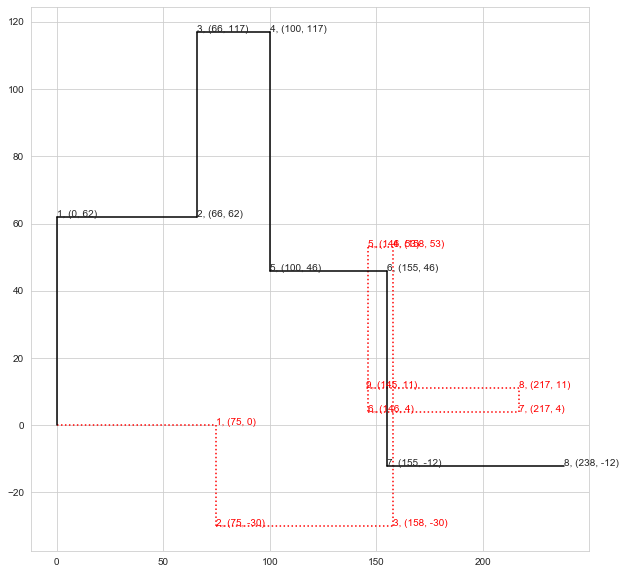

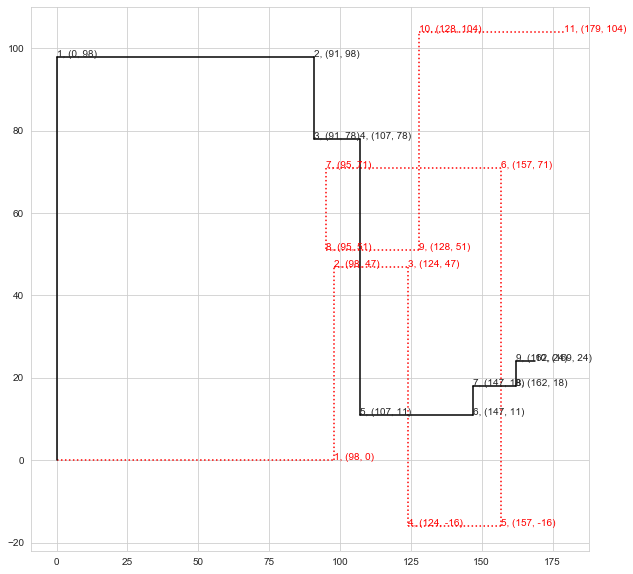

In [17]:
for i in ins:
    wire_diagram(*i)

In [20]:
if tests(intersection_dist,ins,outs):
    print ("All tests pass")

All tests pass


In [21]:
with open("2019_12_3-input.txt") as fileobj:
    raw = fileobj.read()
paths = raw.split("\n")

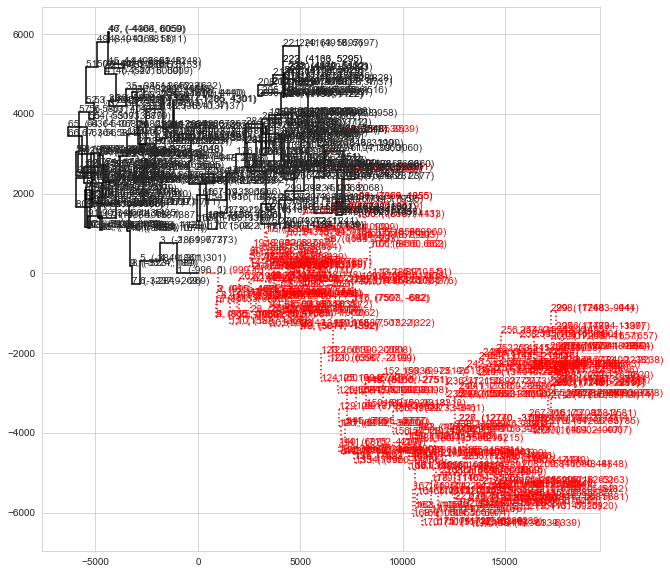

In [22]:
wire_diagram(paths[0].split(","), paths[1].split(","))

In [23]:
intersection_dist(paths[0].split(","),paths[1].split(","))

8015